# Importing Libraries

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# loading the dataset


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Metrics and Losses

In [4]:
from sklearn.metrics import accuracy_score


# Plotting

In [6]:
import matplotlib.pyplot as plt

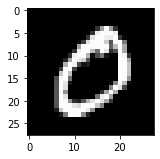

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))